# **Bộ dữ liệu được chọn**


*   Estimation of Obesity Levels Based On Eating Habits and Physical Condition.
*   Ước tính mức độ béo phì của các cá nhân đến từ các quốc gia Mexico, Peru và Colombia, dựa trên thói quen ăn uống và tình trạng thể chất.
*   Đường dẫn: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition



# **Import bộ dữ liệu**

In [ ]:
import pandas as pd
import seaborn as sns

path = 'https://archive.ics.uci.edu/static/public/544/data.csv'

raw_df = pd.read_csv(path)

# **Hiển thị 5 dòng đầu của bộ dữ liệu**

In [ ]:
raw_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# **Thống kê thông tin của từng thuộc tính trong bộ dữ liệu**

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# **Trực quan hóa dữ liệu bằng đồ thị**




*   **Các thuộc tính thuộc dạng Categorical và Binary**






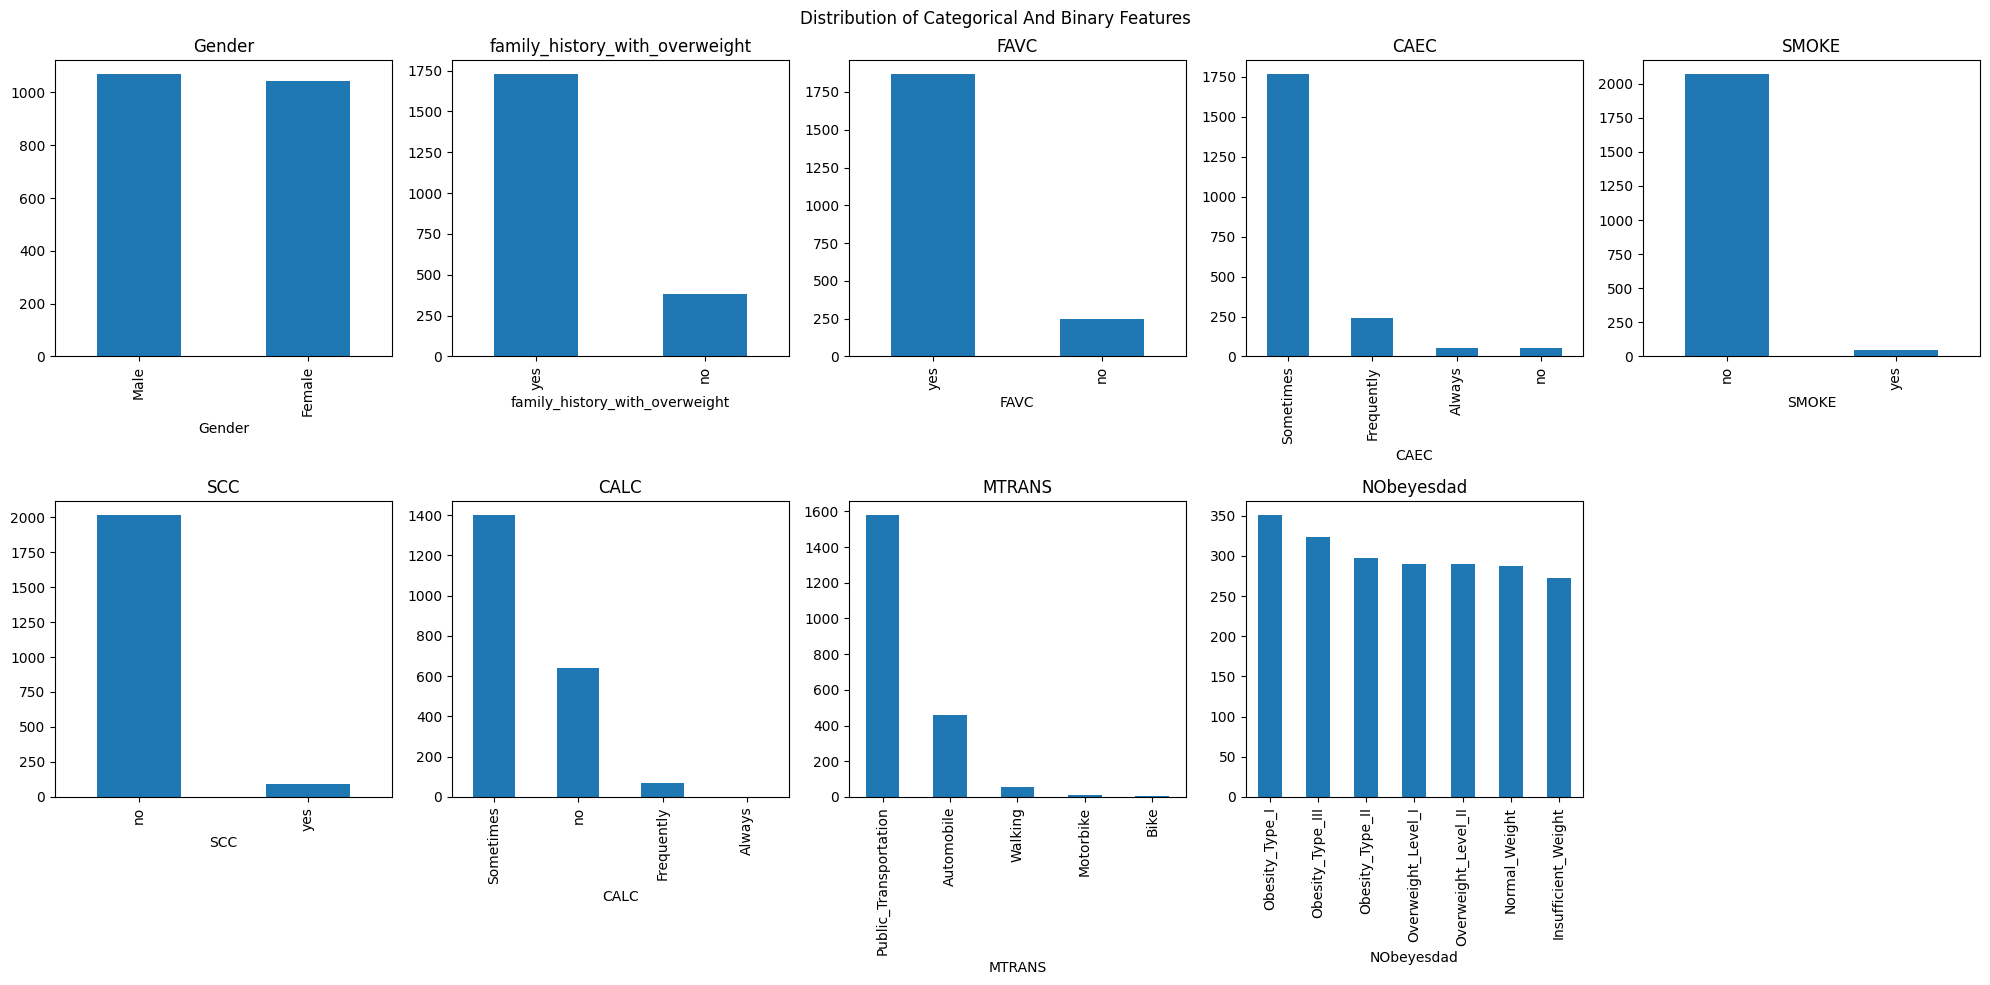

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize = (20, 10))

raw_df["Gender"].value_counts().plot(kind="bar", ax=ax[0,0], title="Gender")
raw_df["family_history_with_overweight"].value_counts().plot(kind="bar", ax=ax[0,1], title="family_history_with_overweight")
raw_df["FAVC"].value_counts().plot(kind="bar", ax=ax[0,2], title="FAVC")
raw_df["CAEC"].value_counts().plot(kind="bar", ax=ax[0,3], title="CAEC")
raw_df["SMOKE"].value_counts().plot(kind="bar", ax=ax[0,4], title="SMOKE")
raw_df["SCC"].value_counts().plot(kind="bar", ax=ax[1,0], title="SCC")
raw_df["CALC"].value_counts().plot(kind="bar", ax=ax[1,1], title="CALC")
raw_df["MTRANS"].value_counts().plot(kind="bar", ax=ax[1,2], title="MTRANS")
raw_df["NObeyesdad"].value_counts().plot(kind="bar", ax=ax[1,3], title="NObeyesdad")

ax[1, 4].axis('off')

plt.suptitle("Distribution of Categorical And Binary Features")
plt.tight_layout()
plt.show()

*   **Các thuộc tính thuộc dạng Numeric**




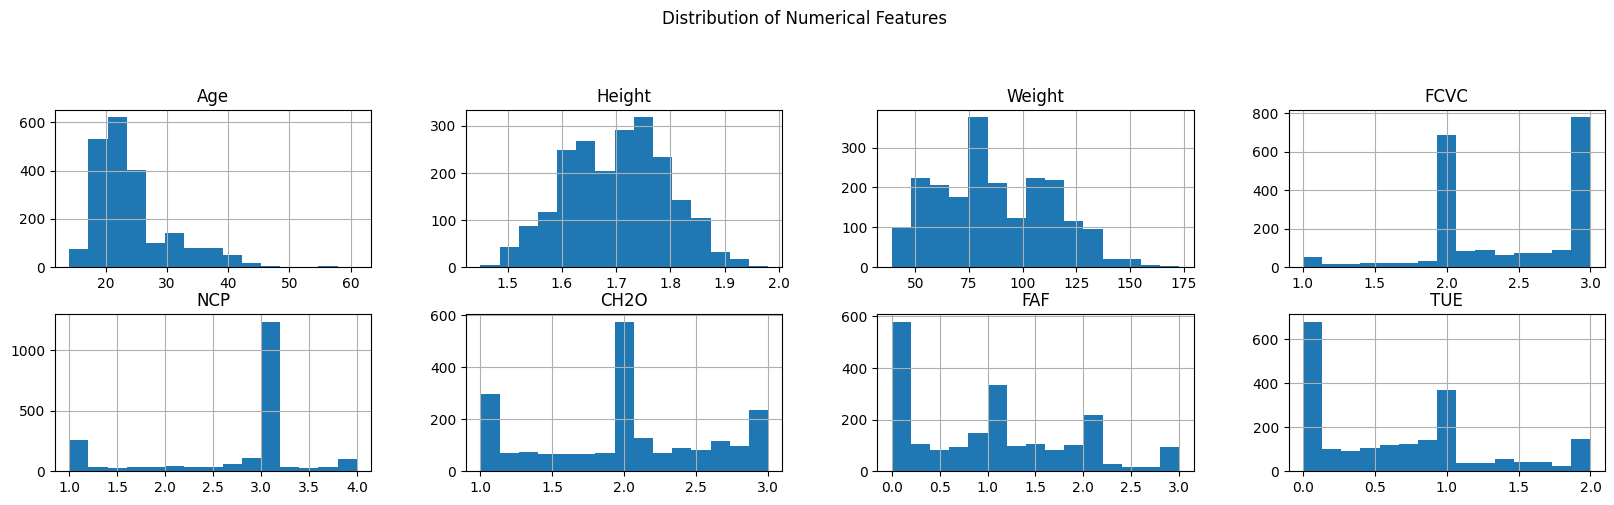

In [ ]:
raw_df.hist(bins=15, figsize=(20, 10), layout=(4, 4))
plt.suptitle("Distribution of Numerical Features")
plt.show()

*   **Phân bổ giá trị của biến mục tiêu**



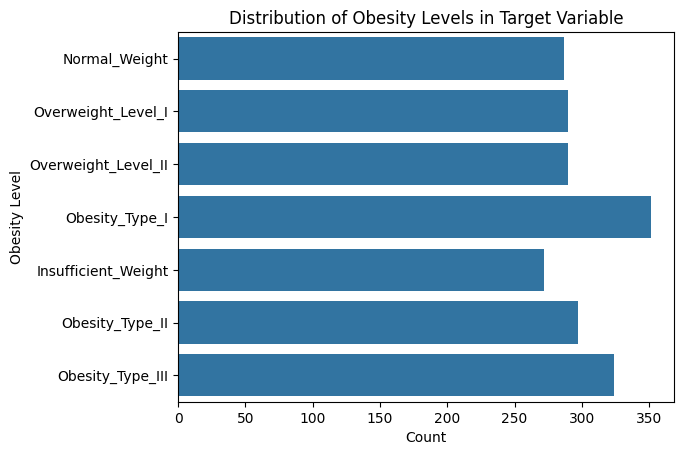

In [ ]:
sns.countplot(y='NObeyesdad', data=raw_df)
plt.title("Distribution of Obesity Levels in Target Variable")
plt.xlabel("Count")
plt.ylabel("Obesity Level")
plt.show()

*   **Vẽ biểu đồ Boxplot**



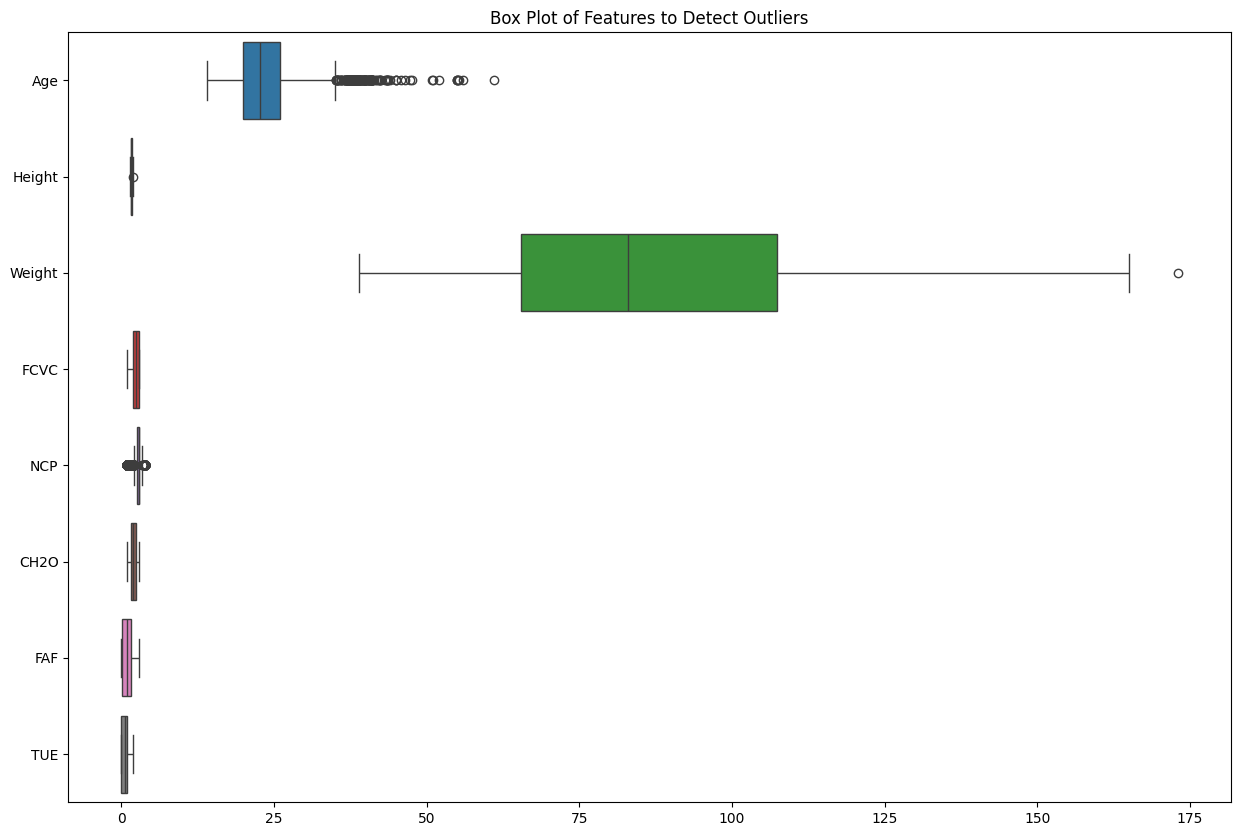

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=raw_df, orient='h')
plt.title("Box Plot of Features to Detect Outliers")
plt.show()

*   **Mối quan hệ giữa chiều cao và cân nặng với mức độ béo phì**



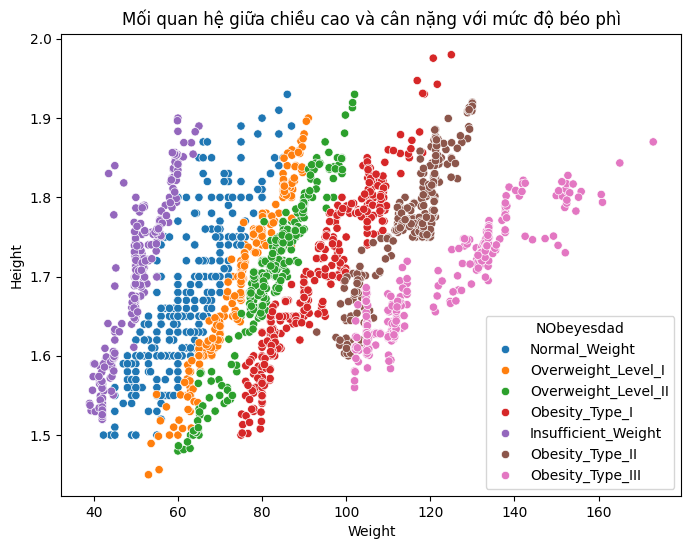

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Height', hue='NObeyesdad', data=raw_df)
plt.title('Mối quan hệ giữa chiều cao và cân nặng với mức độ béo phì')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# **Tiền xử lý dữ liệu**

*   **Loại bỏ Missing Values (Nếu có)**




In [ ]:
df = raw_df.copy()

df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


*   **Type conversion và Data normalization**


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder

label_encoder = LabelEncoder()
scaler = StandardScaler()

binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
continuous_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

df = pd.get_dummies(df, columns=["MTRANS"], drop_first=True)

for feature in binary_features:
    df[feature] = label_encoder.fit_transform(df[feature])

for feature in continuous_features:
    df[feature] = scaler.fit_transform(df[[feature]])

oridinal_encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df[["CAEC"]] = oridinal_encoder.fit_transform(df[["CAEC"]])

oridinal_encoder = OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always']])
df[["CALC"]] = oridinal_encoder.fit_transform(df[["CALC"]])

oridinal_encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
df["NObeyesdad"] = oridinal_encoder.fit_transform(df[["NObeyesdad"]])

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,1.0,0,-0.013073,0,-1.188039,0.561997,0.0,1.0,False,False,True,False
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1.0,1,1.618759,1,2.339750,-1.080625,1.0,1.0,False,False,True,False
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,1.0,0,-0.013073,0,1.163820,0.561997,2.0,1.0,False,False,True,False
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,1.0,0,-0.013073,0,1.163820,-1.080625,2.0,2.0,False,False,False,True
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,1.0,0,-0.013073,0,-1.188039,-1.080625,1.0,3.0,False,False,True,False


# **Chia dữ liệu thành tập train và test**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train:", X_train.shape)
print("Y train:", y_train.shape)
print()
print("X test:", X_test.shape)
print("Y test:", y_test.shape)

X train: (1688, 19)
Y train: (1688,)

X test: (423, 19)
Y test: (423,)


# **Thực hiện phân loại (Classification)**

1.   **Decision Tree**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_pred_dt, y_test, average="weighted")
precision_dt = precision_score(y_pred_dt, y_test, average="weighted")
recall_dt = recall_score(y_pred_dt, y_test, average="weighted")

print(f"Accuracy score: {accuracy_dt}")
print(f"F1 score: {f1_dt}")
print(f"Precision score: {precision_dt}")
print(f"Recall score: {recall_dt}")

Accuracy score: 0.9408983451536643
F1 score: 0.9409410958562603
Precision score: 0.9413267850124405
Recall score: 0.9408983451536643


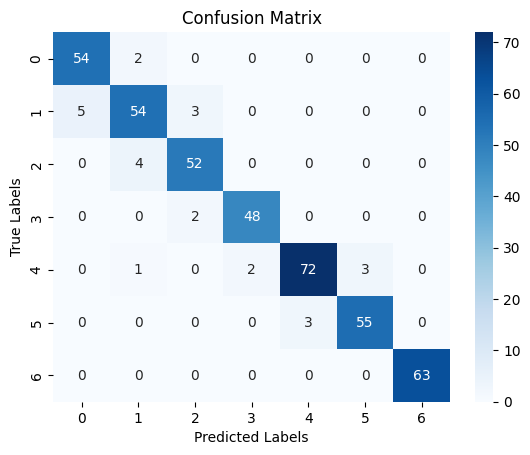

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

2.   **Naive Bayes**



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_pred_nb, y_test, average="weighted")
precision_nb = precision_score(y_pred_nb, y_test, average="weighted")
recall_nb = recall_score(y_pred_nb, y_test, average="weighted")

print(f"Accuracy score: {accuracy_nb}")
print(f"F1 score: {f1_nb}")
print(f"Precision score: {precision_nb}")
print(f"Recall score: {recall_nb}")

Accuracy score: 0.5650118203309693
F1 score: 0.6369670937207136
Precision score: 0.8080854054709167
Recall score: 0.5650118203309693


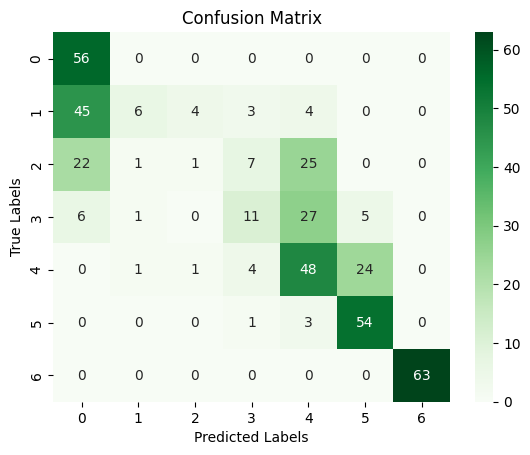

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

3.   **MLP Classifier (Multi-layer Perceptron Classifier)**



In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()

mlpc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
y_pred_mlpc = mlpc.predict(X_test)

In [ ]:
accuracy_mlpc = accuracy_score(y_test, y_pred_mlpc)
f1_mlpc = f1_score(y_pred_mlpc, y_test, average="weighted")
precision_mlpc = precision_score(y_pred_mlpc, y_test, average="weighted")
recall_mlpc = recall_score(y_pred_mlpc, y_test, average="weighted")

print(f"Accuracy score: {accuracy_mlpc}")
print(f"F1 score: {f1_mlpc}")
print(f"Precision score: {precision_mlpc}")
print(f"Recall score: {recall_mlpc}")

Accuracy score: 0.9290780141843972
F1 score: 0.9297047163039377
Precision score: 0.9311513603526004
Recall score: 0.9290780141843972


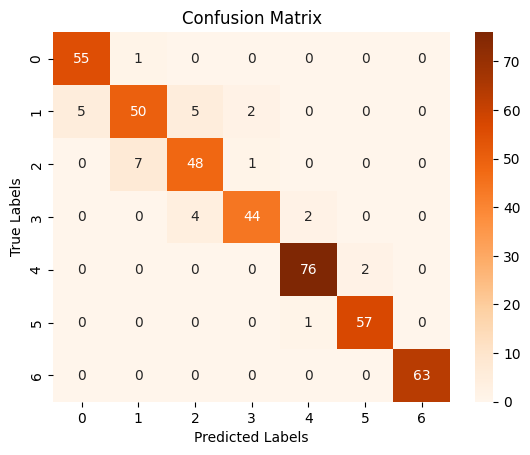

In [ ]:
cm_mlpc = confusion_matrix(y_test, y_pred_mlpc)

sns.heatmap(cm_mlpc, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Thực hiện hồi quy (Regression)**





1.   **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R^2 Score: {r2_lr}")
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"Mean Absolute Error: {mae_lr}")

R^2 Score: 0.9552260577774837
Mean Squared Error: 0.1780482935107613
Root Mean Squared Error: 0.4219576916122768
Mean Absolute Error: 0.32103379143565186


2.   **SVR (Support Vector Regresion)**






In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred_svr = svr.predict(X_test)

In [ ]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"R^2 Score: {r2_svr}")
print(f"Mean Squared Error: {mse_svr}")
print(f"Root Mean Squared Error: {rmse_svr}")
print(f"Mean Absolute Error: {mae_svr}")

R^2 Score: 0.9535624007477267
Mean Squared Error: 0.18466400078226564
Root Mean Squared Error: 0.42972549468499727
Mean Absolute Error: 0.3151510651543939


3.   **MLP Regressor (Multi-layer Perceptron Regressor)**



In [ ]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor()

mlpr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [ ]:
y_pred_mlpr = mlpr.predict(X_test)

In [ ]:
mse_mlpr = mean_squared_error(y_test, y_pred_mlpr)
rmse_mlpr = root_mean_squared_error(y_test, y_pred_mlpr)
mae_mlpr = mean_absolute_error(y_test, y_pred_mlpr)
r2_mlpr = r2_score(y_test, y_pred_mlpr)

print(f"R^2 Score: {r2_mlpr}")
print(f"Mean Squared Error: {mse_mlpr}")
print(f"Root Mean Squared Error: {rmse_mlpr}")
print(f"Mean Absolute Error: {mae_mlpr}")

R^2 Score: 0.9784735228057592
Mean Squared Error: 0.0856023021311143
Root Mean Squared Error: 0.29257871100118393
Mean Absolute Error: 0.20967537707700276


# **Đánh giá kết quả và so sánh các phương pháp**

*   **Các phương pháp phân loại với nhau**




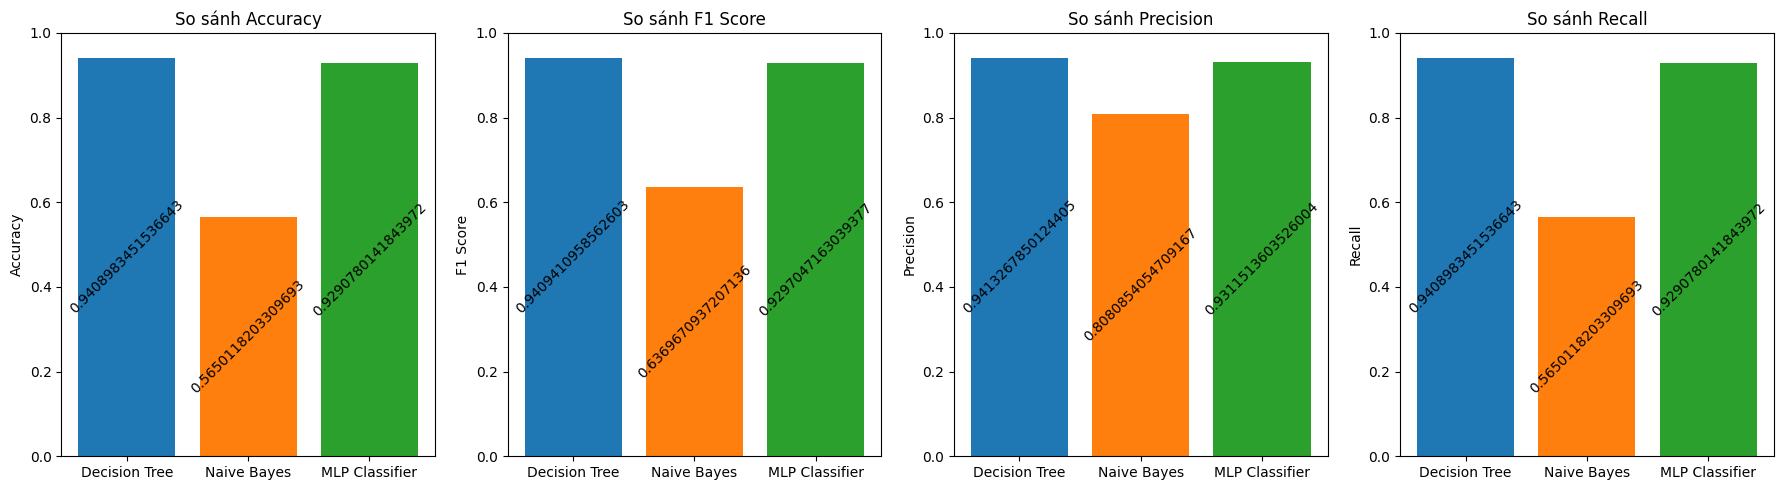

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['Decision Tree', 'Naive Bayes', "MLP Classifier"]

accuracies = [accuracy_dt, accuracy_nb, accuracy_mlpc]
f1_scores = [f1_dt, f1_nb, f1_mlpc]
precisions = [precision_dt, precision_nb, precision_mlpc]
recalls = [recall_dt, recall_nb, recall_mlpc]

barplot_accuracies = axes[0].bar(labels, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_accuracies, labels=accuracies, label_type='center', rotation=45)

barplot_F1 = axes[1].bar(labels, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh F1 Score')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim(0, 1)
axes[1].bar_label(barplot_F1, labels=f1_scores, label_type='center', rotation=45)


barplot_precisions = axes[2].bar(labels, precisions, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh Precision')
axes[2].set_ylabel('Precision')
axes[2].set_ylim(0, 1)
axes[2].bar_label(barplot_precisions, labels=precisions, label_type='center', rotation=45)


barplot_recalls = axes[3].bar(labels, recalls, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh Recall')
axes[3].set_ylabel('Recall')
axes[3].set_ylim(0, 1)
axes[3].bar_label(barplot_recalls, labels=recalls, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

*   **Các phương pháp hồi quy với nhau**



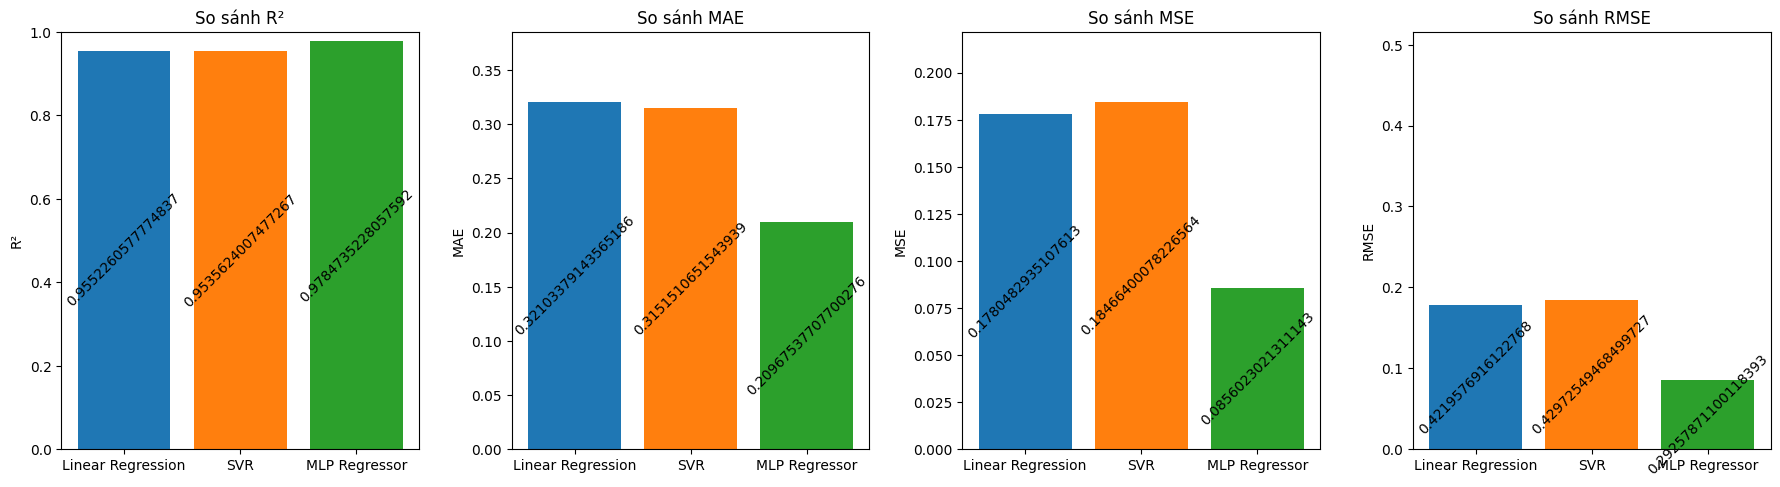

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['Linear Regression', 'SVR', "MLP Regressor"]

r2_values = [r2_lr, r2_svr, r2_mlpr]
mae_values = [mae_lr, mae_svr, mae_mlpr]
mse_values = [mse_lr, mse_svr, mse_mlpr]
rmse_values = [rmse_lr, rmse_svr, rmse_mlpr]

barplot_R2 = axes[0].bar(labels, r2_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh R²')
axes[0].set_ylabel('R²')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_R2, labels=r2_values, label_type='center', rotation=45)

barplot_MAE = axes[1].bar(labels, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh MAE')
axes[1].set_ylabel('MAE')
axes[1].set_ylim(0, max(mae_values) * 1.2)
axes[1].bar_label(barplot_MAE, labels=mae_values, label_type='center', rotation=45)


barplot_MSE = axes[2].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh MSE')
axes[2].set_ylabel('MSE')
axes[2].set_ylim(0, max(mse_values) * 1.2)
axes[2].bar_label(barplot_MSE, labels=mse_values, label_type='center', rotation=45)

barplot_RMSE = axes[3].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh RMSE')
axes[3].set_ylabel('RMSE')
axes[3].set_ylim(0, max(rmse_values) * 1.2)
axes[3].bar_label(barplot_RMSE, labels=rmse_values, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

# **Giải pháp Overfitting**

1.   **Cho mô hình phân loại**





*   Decision Tree - Pruning



In [ ]:
dt_prune = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=1)
dt_prune.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [ ]:
y_pred_dt_prune = dt_prune.predict(X_test)

accuracy_dt_prune = accuracy_score(y_test, y_pred_dt_prune)
f1_dt_prune = f1_score(y_test, y_pred_dt_prune, average="weighted")
precision_dt_prune = precision_score(y_test, y_pred_dt_prune, average="weighted")
recall_dt_prune = recall_score(y_test, y_pred_dt_prune, average="weighted")

print(f"Accuracy: {accuracy_dt_prune}")
print(f"F1 Score: {f1_dt_prune}")
print(f"Precision: {precision_dt_prune}")
print(f"Recall: {recall_dt_prune}")

Accuracy: 0.9456264775413712
F1 Score: 0.9454785995424921
Precision: 0.9461577142778903
Recall: 0.9456264775413712


*   MLP Classifier - Early Stop



In [ ]:
mlpc_et = MLPClassifier(activation ='tanh', alpha= 0.0001, hidden_layer_sizes= (50, 50), solver= 'adam', max_iter=500, early_stopping=True, verbose=10)

mlpc_et.fit(X_train, y_train)

Iteration 1, loss = 1.95532743
Validation score: 0.313609
Iteration 2, loss = 1.76161916
Validation score: 0.414201
Iteration 3, loss = 1.61273491
Validation score: 0.526627
Iteration 4, loss = 1.48966484
Validation score: 0.603550
Iteration 5, loss = 1.38473305
Validation score: 0.585799
Iteration 6, loss = 1.29698363
Validation score: 0.603550
Iteration 7, loss = 1.21997051
Validation score: 0.627219
Iteration 8, loss = 1.15406549
Validation score: 0.644970
Iteration 9, loss = 1.09477471
Validation score: 0.662722
Iteration 10, loss = 1.04274345
Validation score: 0.662722
Iteration 11, loss = 0.99574580
Validation score: 0.680473
Iteration 12, loss = 0.95328713
Validation score: 0.715976
Iteration 13, loss = 0.91314306
Validation score: 0.715976
Iteration 14, loss = 0.87671046
Validation score: 0.733728
Iteration 15, loss = 0.84180327
Validation score: 0.745562
Iteration 16, loss = 0.80899034
Validation score: 0.751479
Iteration 17, loss = 0.77799323
Validation score: 0.763314
Iterat

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(50, 50), max_iter=500, verbose=10)

In [ ]:
y_pred_mlpc_et = mlpc_et.predict(X_test)

accuracy_mlpc_et = accuracy_score(y_test, y_pred_mlpc_et)
f1_mlpc_et = f1_score(y_pred_mlpc_et, y_test, average="weighted")
precision_mlpc_et = precision_score(y_pred_mlpc_et, y_test, average="weighted")
recall_mlpc_et = recall_score(y_pred_mlpc_et, y_test, average="weighted")

print(f"Accuracy score: {accuracy_mlpc_et}")
print(f"F1 score: {f1_mlpc_et}")
print(f"Precision score: {precision_mlpc_et}")
print(f"Recall score: {recall_mlpc_et}")

Accuracy score: 0.9432624113475178
F1 score: 0.9437748556231621
Precision score: 0.9453017030067179
Recall score: 0.9432624113475178


2.   **Cho mô hình hồi quy**



*   SVR - Hyperparameter Tuning - Tối ưu hóa các tham số



In [ ]:
from sklearn.model_selection import GridSearchCV

param_svr = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear', "sigmoid"]}

grid_search_svr = GridSearchCV(svr, param_svr, cv=5)

grid_search_svr.fit(X_train, y_train)

print("Best params for SVR:", grid_search_svr.best_params_)

svr_tune = grid_search_svr.best_estimator_

Best params for SVR: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
y_pred_svr_tune = svr_tune.predict(X_test)

mse_svr_tune = mean_squared_error(y_test, y_pred_svr_tune)
rmse_svr_tune = root_mean_squared_error(y_test, y_pred_svr_tune)
mae_svr_tune = mean_absolute_error(y_test, y_pred_svr_tune)
r2_svr_tune = r2_score(y_test, y_pred_svr_tune)

print(f"R^2 Score: {r2_svr_tune}")
print(f"Mean Squared Error: {mse_svr_tune}")
print(f"Root Mean Squared Error: {rmse_svr_tune}")
print(f"Mean Absolute Error: {mae_svr_tune}")

R^2 Score: 0.9807215584138191
Mean Squared Error: 0.07666275193968142
Root Mean Squared Error: 0.2768803928408103
Mean Absolute Error: 0.18299201411708818


*   MLP Regressor - Early Stop



In [ ]:
mlpr_et = MLPRegressor(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (50, 50), learning_rate = 'constant', solver= 'adam', max_iter=200, early_stopping=True, verbose=10)

mlpr_et.fit(X_train, y_train)

Iteration 1, loss = 5.84866495
Validation score: -1.304948
Iteration 2, loss = 3.57472887
Validation score: -0.350655
Iteration 3, loss = 2.07558406
Validation score: 0.208605
Iteration 4, loss = 1.29094463
Validation score: 0.462504
Iteration 5, loss = 0.98482380
Validation score: 0.586970
Iteration 6, loss = 0.77119972
Validation score: 0.692045
Iteration 7, loss = 0.57360595
Validation score: 0.772829
Iteration 8, loss = 0.43666535
Validation score: 0.825751
Iteration 9, loss = 0.34164042
Validation score: 0.869560
Iteration 10, loss = 0.25995049
Validation score: 0.899700
Iteration 11, loss = 0.20396261
Validation score: 0.918886
Iteration 12, loss = 0.16528244
Validation score: 0.932510
Iteration 13, loss = 0.14170773
Validation score: 0.941402
Iteration 14, loss = 0.12740272
Validation score: 0.945239
Iteration 15, loss = 0.11799481
Validation score: 0.948229
Iteration 16, loss = 0.11136979
Validation score: 0.951544
Iteration 17, loss = 0.10631361
Validation score: 0.954564
Iter

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', alpha=0.001, early_stopping=True,
             hidden_layer_sizes=(50, 50), verbose=10)

In [ ]:
y_pred_mlpr_et = mlpr_et.predict(X_test)

mse_mlpr_et = mean_squared_error(y_test, y_pred_mlpr_et)
rmse_mlpr_et = root_mean_squared_error(y_test, y_pred_mlpr_et)
mae_mlpr_et = mean_absolute_error(y_test, y_pred_mlpr_et)
r2_mlpr_et = r2_score(y_test, y_pred_mlpr_et)

print(f"R^2 Score: {r2_mlpr_et}")
print(f"Mean Squared Error: {mse_mlpr_et}")
print(f"Root Mean Squared Error: {rmse_mlpr_et}")
print(f"Mean Absolute Error: {mae_mlpr_et}")

R^2 Score: 0.9841486947009997
Mean Squared Error: 0.0630343838025007
Root Mean Squared Error: 0.2510664927912538
Mean Absolute Error: 0.18322779075757972


3.  **So sánh kết quả với việc không sử dụng giải pháp overfitting**



*   **Decision Tree**



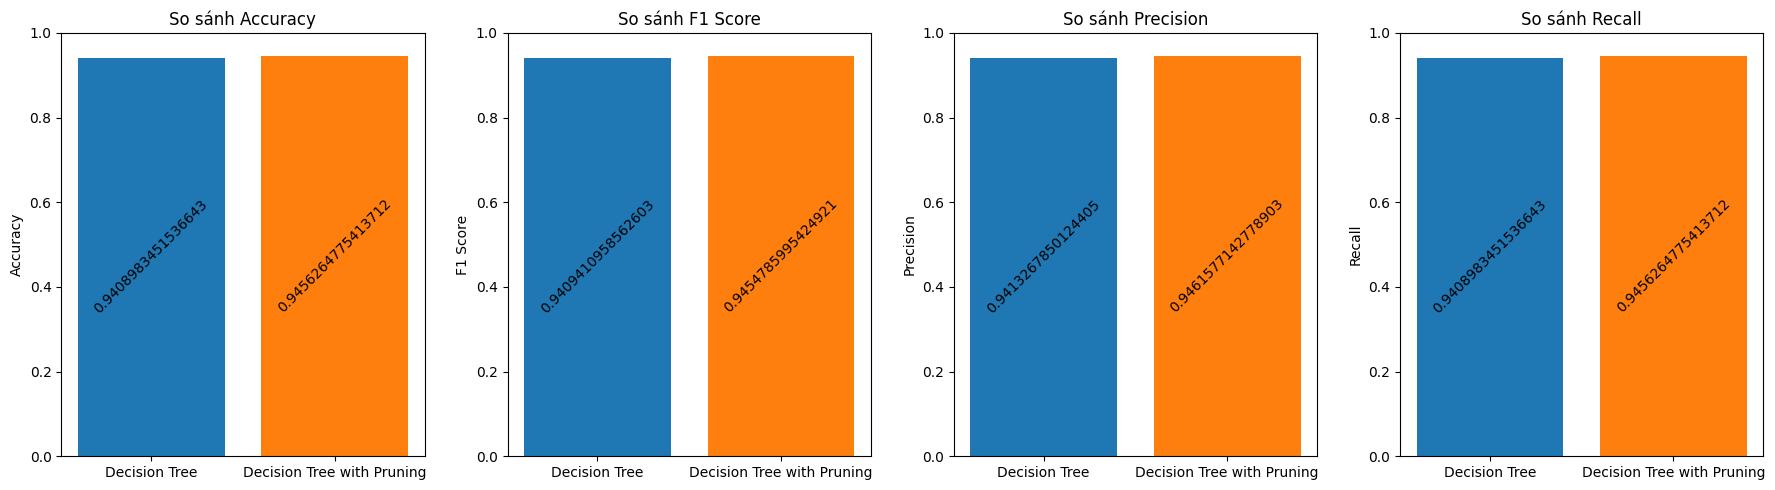

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['Decision Tree', 'Decision Tree with Pruning']

accuracies = [accuracy_dt, accuracy_dt_prune]
f1_scores = [f1_dt, f1_dt_prune]
precisions = [precision_dt, precision_dt_prune]
recalls = [recall_dt, recall_dt_prune]

barplot_accuracies = axes[0].bar(labels, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_accuracies, labels=accuracies, label_type='center', rotation=45)

barplot_F1 = axes[1].bar(labels, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh F1 Score')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim(0, 1)
axes[1].bar_label(barplot_F1, labels=f1_scores, label_type='center', rotation=45)


barplot_precisions = axes[2].bar(labels, precisions, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh Precision')
axes[2].set_ylabel('Precision')
axes[2].set_ylim(0, 1)
axes[2].bar_label(barplot_precisions, labels=precisions, label_type='center', rotation=45)


barplot_recalls = axes[3].bar(labels, recalls, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh Recall')
axes[3].set_ylabel('Recall')
axes[3].set_ylim(0, 1)
axes[3].bar_label(barplot_recalls, labels=recalls, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

*   **MLP Classifier**



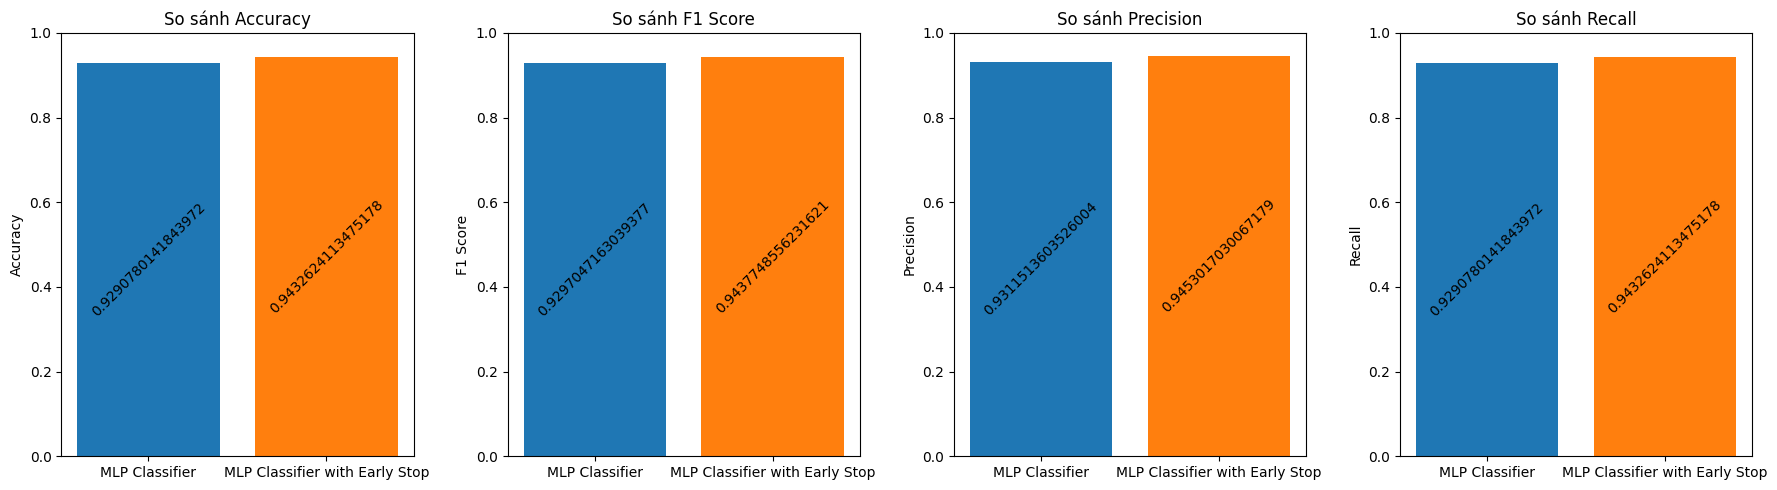

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['MLP Classifier', 'MLP Classifier with Early Stop']

accuracies = [accuracy_mlpc, accuracy_mlpc_et]
f1_scores = [f1_mlpc, f1_mlpc_et]
precisions = [precision_mlpc, precision_mlpc_et]
recalls = [recall_mlpc, recall_mlpc_et]

barplot_accuracies = axes[0].bar(labels, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_accuracies, labels=accuracies, label_type='center', rotation=45)

barplot_F1 = axes[1].bar(labels, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh F1 Score')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim(0, 1)
axes[1].bar_label(barplot_F1, labels=f1_scores, label_type='center', rotation=45)


barplot_precisions = axes[2].bar(labels, precisions, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh Precision')
axes[2].set_ylabel('Precision')
axes[2].set_ylim(0, 1)
axes[2].bar_label(barplot_precisions, labels=precisions, label_type='center', rotation=45)


barplot_recalls = axes[3].bar(labels, recalls, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh Recall')
axes[3].set_ylabel('Recall')
axes[3].set_ylim(0, 1)
axes[3].bar_label(barplot_recalls, labels=recalls, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

*   **SVR**


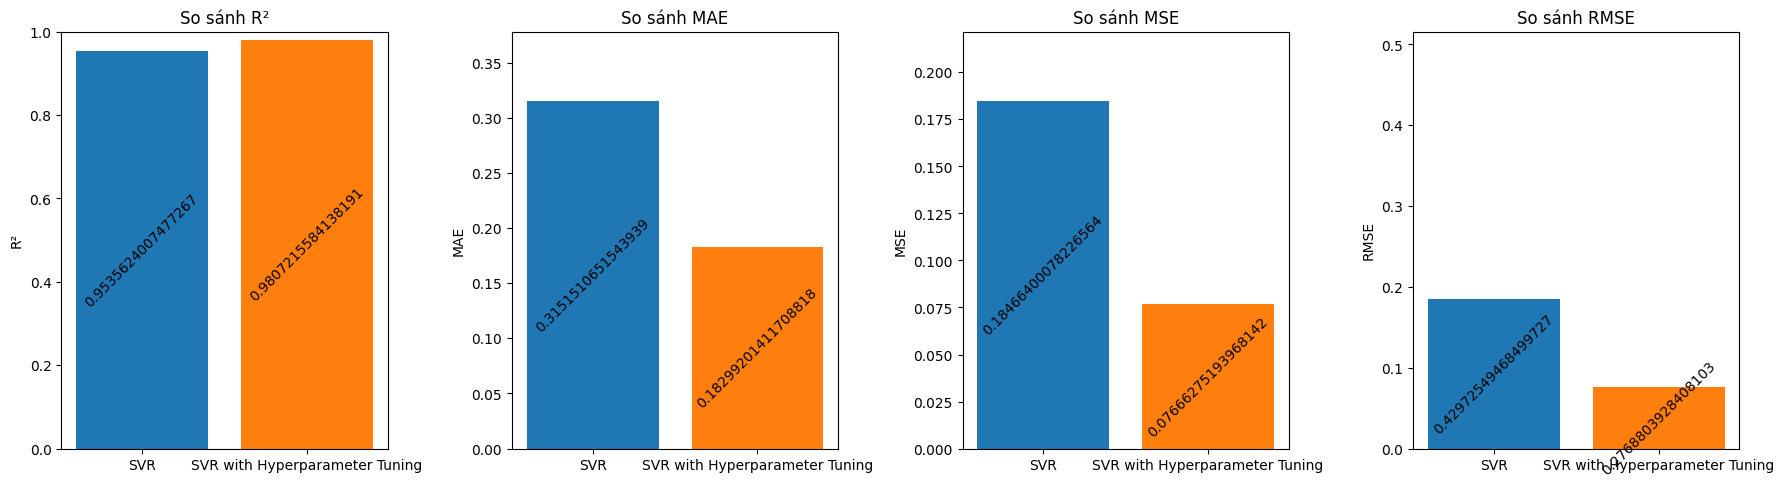

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['SVR', "SVR with Hyperparameter Tuning"]

r2_values = [r2_svr, r2_svr_tune]
mae_values = [mae_svr, mae_svr_tune]
mse_values = [mse_svr, mse_svr_tune]
rmse_values = [rmse_svr, rmse_svr_tune]

barplot_R2 = axes[0].bar(labels, r2_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh R²')
axes[0].set_ylabel('R²')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_R2, labels=r2_values, label_type='center', rotation=45)

barplot_MAE = axes[1].bar(labels, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh MAE')
axes[1].set_ylabel('MAE')
axes[1].set_ylim(0, max(mae_values) * 1.2)
axes[1].bar_label(barplot_MAE, labels=mae_values, label_type='center', rotation=45)


barplot_MSE = axes[2].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh MSE')
axes[2].set_ylabel('MSE')
axes[2].set_ylim(0, max(mse_values) * 1.2)
axes[2].bar_label(barplot_MSE, labels=mse_values, label_type='center', rotation=45)

barplot_RMSE = axes[3].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh RMSE')
axes[3].set_ylabel('RMSE')
axes[3].set_ylim(0, max(rmse_values) * 1.2)
axes[3].bar_label(barplot_RMSE, labels=rmse_values, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

*   **MLP Regressor**



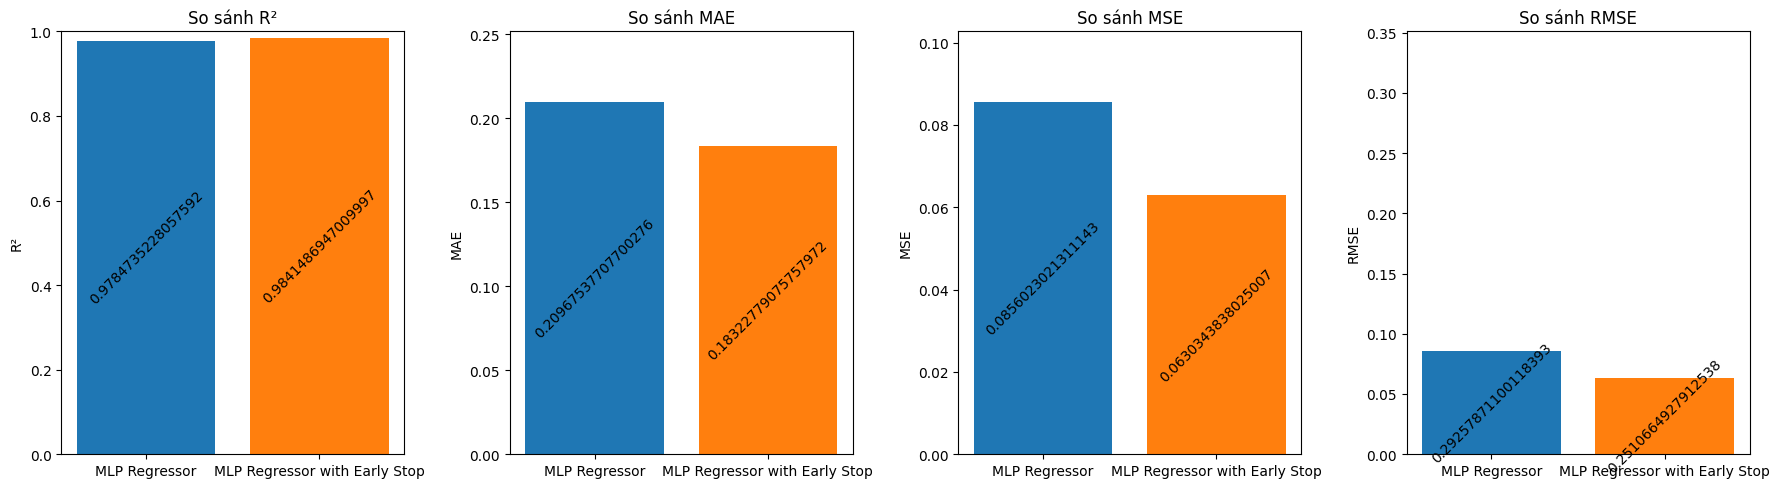

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['MLP Regressor', "MLP Regressor with Early Stop"]

r2_values = [r2_mlpr, r2_mlpr_et]
mae_values = [mae_mlpr, mae_mlpr_et]
mse_values = [mse_mlpr, mse_mlpr_et]
rmse_values = [rmse_mlpr, rmse_mlpr_et]

barplot_R2 = axes[0].bar(labels, r2_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh R²')
axes[0].set_ylabel('R²')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_R2, labels=r2_values, label_type='center', rotation=45)

barplot_MAE = axes[1].bar(labels, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh MAE')
axes[1].set_ylabel('MAE')
axes[1].set_ylim(0, max(mae_values) * 1.2)
axes[1].bar_label(barplot_MAE, labels=mae_values, label_type='center', rotation=45)


barplot_MSE = axes[2].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh MSE')
axes[2].set_ylabel('MSE')
axes[2].set_ylim(0, max(mse_values) * 1.2)
axes[2].bar_label(barplot_MSE, labels=mse_values, label_type='center', rotation=45)

barplot_RMSE = axes[3].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh RMSE')
axes[3].set_ylabel('RMSE')
axes[3].set_ylim(0, max(rmse_values) * 1.2)
axes[3].bar_label(barplot_RMSE, labels=rmse_values, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

# **Feature selection using correlation analysis**

*   **Vẽ Correlation Matrix**



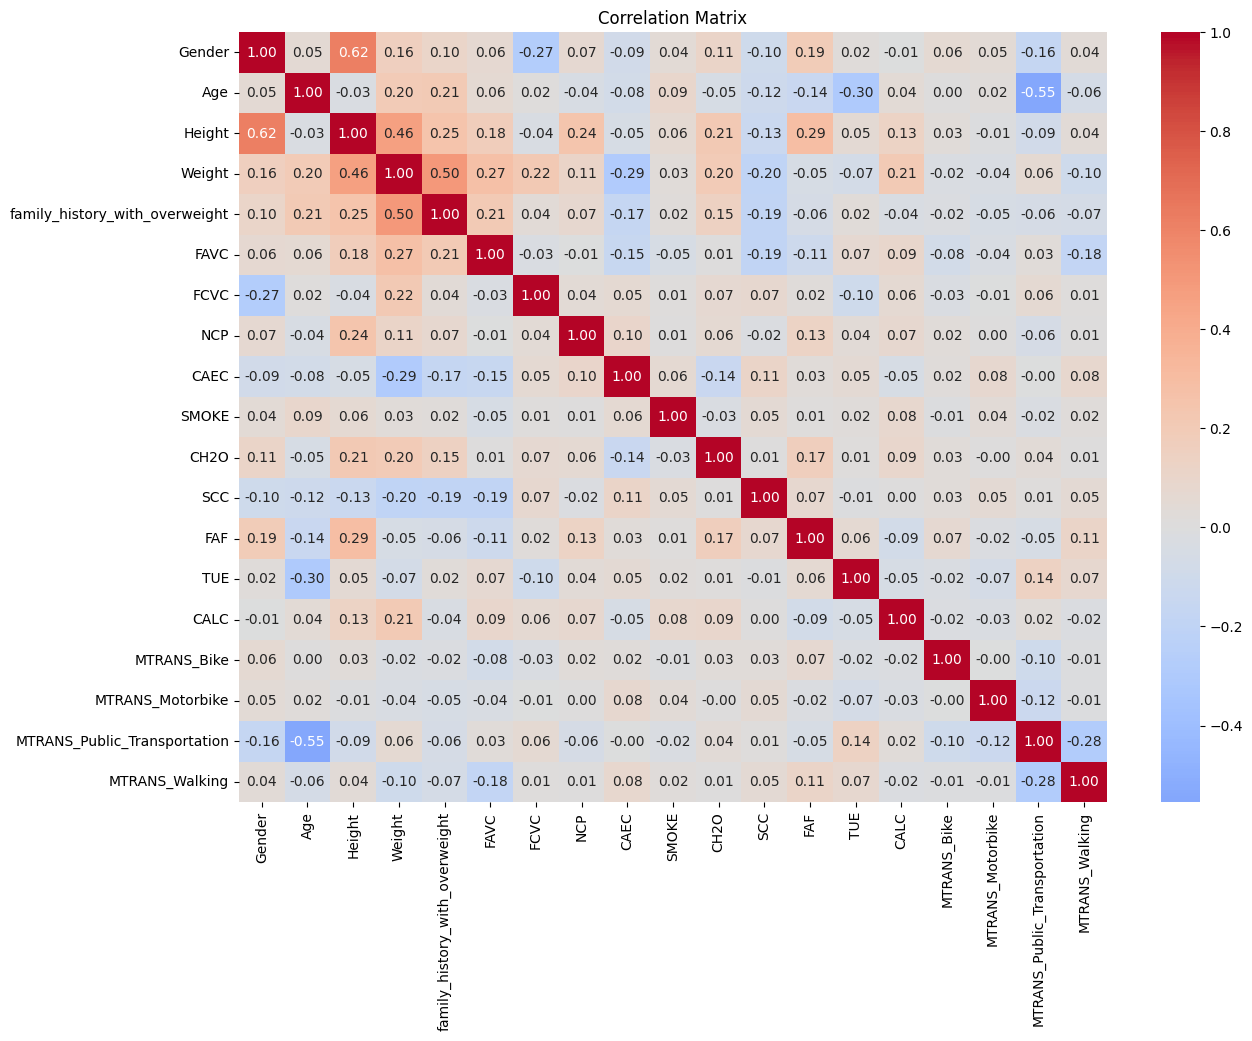

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

*   **Feature Selection - Threshold 0.6**



In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

corr_features = correlation(X, 0.6)
print(corr_features)

{'Height'}


*   **Bộ dữ liệu mới sau khi Feature Selection**



In [ ]:
new_df = df.copy()
new_df.drop(corr_features, axis=1, inplace=True)
new_df.head()

,Gender,Age,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.862558,1,0,-0.785019,0.404153,1.0,0,-0.013073,0,-1.188039,0.561997,0.0,1.0,False,False,True,False
1,0,-0.522124,-1.168077,1,0,1.088342,0.404153,1.0,1,1.618759,1,2.339750,-1.080625,1.0,1.0,False,False,True,False
2,1,-0.206889,-0.366090,1,0,-0.785019,0.404153,1.0,0,-0.013073,0,1.163820,0.561997,2.0,1.0,False,False,True,False
3,1,0.423582,0.015808,0,0,1.088342,0.404153,1.0,0,-0.013073,0,1.163820,-1.080625,2.0,2.0,False,False,False,True
4,1,-0.364507,0.122740,0,0,-0.785019,-2.167023,1.0,0,-0.013073,0,-1.188039,-1.080625,1.0,3.0,False,False,True,False


# **Chia dữ liệu thành tập train và test**

In [ ]:
X = new_df.drop(['NObeyesdad'], axis=1)
y = new_df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train:", X_train.shape)
print("Y train:", y_train.shape)
print()
print("X test:", X_test.shape)
print("Y test:", y_test.shape)

X train: (1688, 18)
Y train: (1688,)

X test: (423, 18)
Y test: (423,)


# **Thực hiện phân loại (Classification)**

1.   **Decision Tree**



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_pred_dt, y_test, average="weighted")
precision_dt = precision_score(y_pred_dt, y_test, average="weighted")
recall_dt = recall_score(y_pred_dt, y_test, average="weighted")

print(f"Accuracy score: {accuracy_dt}")
print(f"F1 score: {f1_dt}")
print(f"Precision score: {precision_dt}")
print(f"Recall score: {recall_dt}")

Accuracy score: 0.8605200945626478
F1 score: 0.8604985852049981
Precision score: 0.8612642166827668
Recall score: 0.8605200945626478


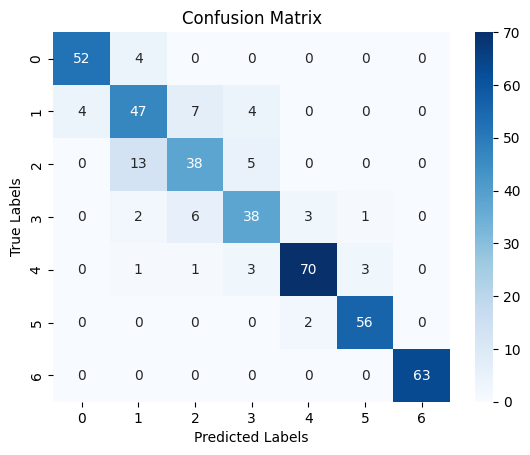

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

2.   **Naive Bayes**



In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_pred_nb, y_test, average="weighted")
precision_nb = precision_score(y_pred_nb, y_test, average="weighted")
recall_nb = recall_score(y_pred_nb, y_test, average="weighted")

print(f"Accuracy score: {accuracy_nb}")
print(f"F1 score: {f1_nb}")
print(f"Precision score: {precision_nb}")
print(f"Recall score: {recall_nb}")

Accuracy score: 0.5673758865248227
F1 score: 0.6397503205872361
Precision score: 0.8114684657138448
Recall score: 0.5673758865248227


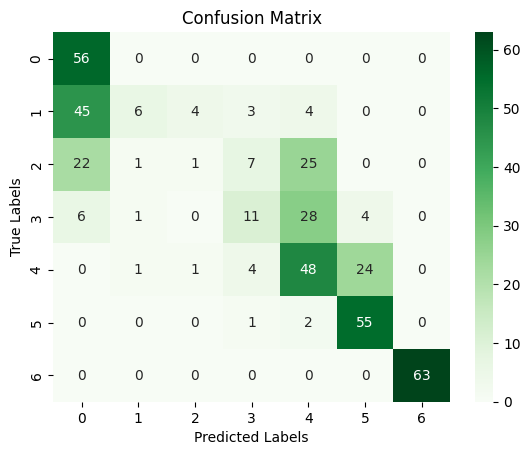

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

3.   **MLP Classifier (Multi-layer Perceptron Classifier)**



In [ ]:
mlpc = MLPClassifier(activation ='tanh', alpha= 0.0001,
                    hidden_layer_sizes= (50, 50), solver= 'adam', max_iter=500)

mlpc.fit(X_train, y_train)

y_pred_mlpc = mlpc.predict(X_test)

accuracy_mlpc = accuracy_score(y_test, y_pred_mlpc)
f1_mlpc = f1_score(y_pred_mlpc, y_test, average="weighted")
precision_mlpc = precision_score(y_pred_mlpc, y_test, average="weighted")
recall_mlpc = recall_score(y_pred_mlpc, y_test, average="weighted")

print(f"Accuracy score: {accuracy_mlpc}")
print(f"F1 score: {f1_mlpc}")
print(f"Precision score: {precision_mlpc}")
print(f"Recall score: {recall_mlpc}")

Accuracy score: 0.8652482269503546
F1 score: 0.865834292843661
Precision score: 0.8683326939786836
Recall score: 0.8652482269503546


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


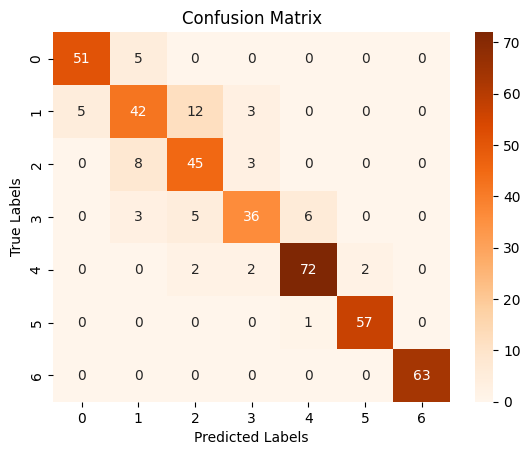

In [ ]:
cm_mlpc = confusion_matrix(y_test, y_pred_mlpc)

sns.heatmap(cm_mlpc, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Thực hiện hồi quy (Regression)**





1.   **Linear Regression**

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R^2 Score: {r2_lr}")
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"Mean Absolute Error: {mae_lr}")

R^2 Score: 0.9048008722713786
Mean Squared Error: 0.3785693507075208
Root Mean Squared Error: 0.6152798962322114
Mean Absolute Error: 0.5009142498492594


2.   **SVR (Support Vector Regresion)**






In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"R^2 Score: {r2_svr}")
print(f"Mean Squared Error: {mse_svr}")
print(f"Root Mean Squared Error: {rmse_svr}")
print(f"Mean Absolute Error: {mae_svr}")

R^2 Score: 0.9040395591569661
Mean Squared Error: 0.3815967924318804
Root Mean Squared Error: 0.6177352122324584
Mean Absolute Error: 0.4900875737076485


3.   **MLP Regressor (Multi-layer Perceptron Regressor)**



In [ ]:
mlpr = MLPRegressor(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (50, 50), learning_rate = 'constant', solver= 'adam', max_iter=500)

mlpr.fit(X_train, y_train)

y_pred_mlpr = mlpr.predict(X_test)

mse_mlpr = mean_squared_error(y_test, y_pred_mlpr)
rmse_mlpr = root_mean_squared_error(y_test, y_pred_mlpr)
mae_mlpr = mean_absolute_error(y_test, y_pred_mlpr)
r2_mlpr = r2_score(y_test, y_pred_mlpr)

print(f"R^2 Score: {r2_mlpr}")
print(f"Mean Squared Error: {mse_mlpr}")
print(f"Root Mean Squared Error: {rmse_mlpr}")
print(f"Mean Absolute Error: {mae_mlpr}")

R^2 Score: 0.9553956831052419
Mean Squared Error: 0.17737376054260173
Root Mean Squared Error: 0.421157643338693
Mean Absolute Error: 0.28033163069345396


# **Đánh giá kết quả và so sánh các phương pháp**

*   **Các phương pháp phân loại với nhau**




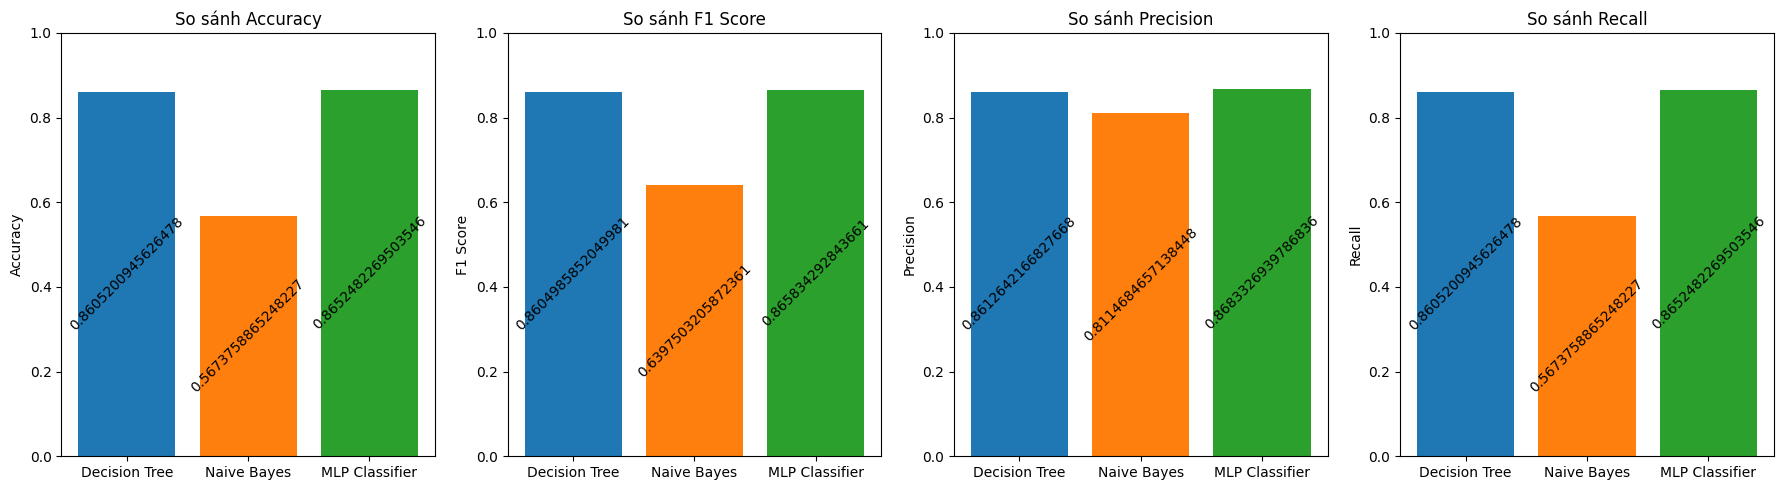

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['Decision Tree', 'Naive Bayes', "MLP Classifier"]

accuracies = [accuracy_dt, accuracy_nb, accuracy_mlpc]
f1_scores = [f1_dt, f1_nb, f1_mlpc]
precisions = [precision_dt, precision_nb, precision_mlpc]
recalls = [recall_dt, recall_nb, recall_mlpc]

barplot_accuracies = axes[0].bar(labels, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_accuracies, labels=accuracies, label_type='center', rotation=45)

barplot_F1 = axes[1].bar(labels, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh F1 Score')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim(0, 1)
axes[1].bar_label(barplot_F1, labels=f1_scores, label_type='center', rotation=45)


barplot_precisions = axes[2].bar(labels, precisions, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh Precision')
axes[2].set_ylabel('Precision')
axes[2].set_ylim(0, 1)
axes[2].bar_label(barplot_precisions, labels=precisions, label_type='center', rotation=45)


barplot_recalls = axes[3].bar(labels, recalls, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh Recall')
axes[3].set_ylabel('Recall')
axes[3].set_ylim(0, 1)
axes[3].bar_label(barplot_recalls, labels=recalls, label_type='center', rotation=45)

plt.tight_layout()
plt.show()

*   **Các phương pháp hồi quy với nhau**



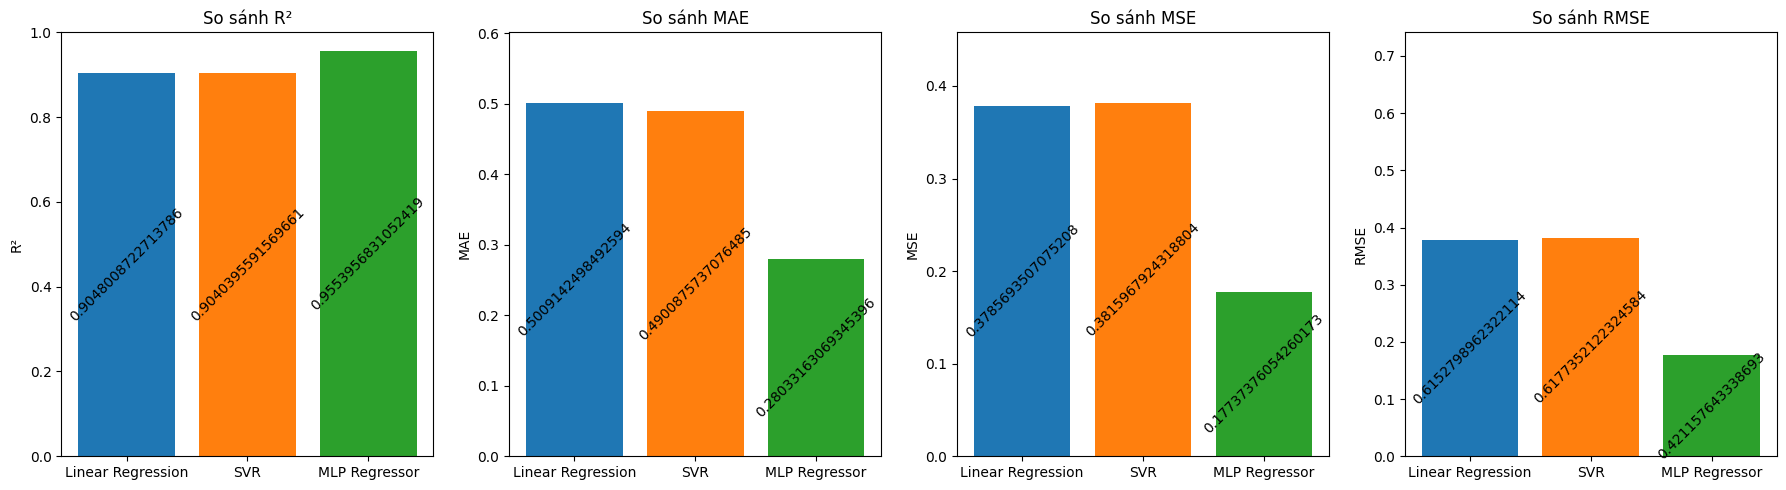

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

labels = ['Linear Regression', 'SVR', "MLP Regressor"]

r2_values = [r2_lr, r2_svr, r2_mlpr]
mae_values = [mae_lr, mae_svr, mae_mlpr]
mse_values = [mse_lr, mse_svr, mse_mlpr]
rmse_values = [rmse_lr, rmse_svr, rmse_mlpr]

barplot_R2 = axes[0].bar(labels, r2_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('So sánh R²')
axes[0].set_ylabel('R²')
axes[0].set_ylim(0, 1)
axes[0].bar_label(barplot_R2, labels=r2_values, label_type='center', rotation=45)

barplot_MAE = axes[1].bar(labels, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('So sánh MAE')
axes[1].set_ylabel('MAE')
axes[1].set_ylim(0, max(mae_values) * 1.2)
axes[1].bar_label(barplot_MAE, labels=mae_values, label_type='center', rotation=45)


barplot_MSE = axes[2].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('So sánh MSE')
axes[2].set_ylabel('MSE')
axes[2].set_ylim(0, max(mse_values) * 1.2)
axes[2].bar_label(barplot_MSE, labels=mse_values, label_type='center', rotation=45)

barplot_RMSE = axes[3].bar(labels, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[3].set_title('So sánh RMSE')
axes[3].set_ylabel('RMSE')
axes[3].set_ylim(0, max(rmse_values) * 1.2)
axes[3].bar_label(barplot_RMSE, labels=rmse_values, label_type='center', rotation=45)

plt.tight_layout()
plt.show()